In [166]:
from bioblend.galaxy import GalaxyInstance
import pandas as pd
from io import StringIO
import os
import requests

# Add galaxy API key
Add `GALAXY_API_KEY` from `https://usegalaxy.eu/user/api_key` via `export GALAXY_API_KEY="<key>"` or `%env  GALAXY_API_KEY=<key>` in jupyter

In [167]:
%env GALAXY_API_KEY=

env: GALAXY_API_KEY=cf4092f19ab187b157fea51f97f2791b


In [168]:
gi = GalaxyInstance(url='https://usegalaxy.eu/', key=os.environ['GALAXY_API_KEY'])

history = gi.histories.show_history('c6a065584d5bc954', contents=True)

In [169]:
data_lookup = {
    "VF":'VFs of genes',
    "AMR":'AMR Identifiied'
} #lookup with a part of the name of the files that should be collected

def get_summary_of_history(history, data_lookup):
        
    summary_df = pd.DataFrame()

    for dataset in history:
        if 'tags' in dataset:
            tags = '/'.join(dataset['tags'])
        else:
            tags = 'no tag'

        name = dataset['name']

        for short_name, lookup in data_lookup.items():

            if lookup in name:
                print(name, tags)
                try:
                    data = gi.datasets.download_dataset(dataset['id'], maxwait = 3)

                    df = pd.read_csv(StringIO(data.decode("utf-8")), sep="\t")

                    summary_df.loc[tags, short_name] = len(df)

                except:
                    pass


    return(summary_df)

In [170]:
summary_df

NameError: name 'summary_df' is not defined

# Plot for multiple histories

In [ ]:
history_links = {
    "pure 01":"https://usegalaxy.eu/u/engy.nasr/h/paper-data-analysis-pure-pathogens-on-10052022",
    "pure 02":"https://usegalaxy.eu/u/engy.nasr/h/paper-data-analysis-pure-pathogens-17022022-1",
    "spiked 01":"https://usegalaxy.eu/u/engy.nasr/h/paper-data-analysis-biolytix-datasets-on-19062022-spiked",
    "spiked 02":"https://usegalaxy.eu/u/engy.nasr/h/paper-data-analysis-biolytix-datasets-on-14072022-spiked",
    "spiked 03":"https://usegalaxy.eu/u/engy.nasr/h/paper-data-analysis-biolytix-datasets-on-20072022-spiked",
    "spiked and depletion 01":"https://usegalaxy.eu/u/engy.nasr/h/paper-data-analysis-biolytix-datasets-on-18082022-spiked---enrichment-for-salmonella-sequences",
    "spiked and depletion 02":"https://usegalaxy.eu/u/engy.nasr/h/paper-data-analysis-biolytix-datasets-on-18082022-spiked---chicken-depletion",
    "dilution": "https://usegalaxy.eu/u/engy.nasr/h/latest-datasets-with-the-latest-workflows-1",
}

for category, history_link in history_links.items():
    
    print('*******************************')
    print(category, history_link)
    
    url = requests.get(history_link).url #follow link to get id
    history_id = url.split("=")[-1]
    
    history = gi.histories.show_history(history_id, contents=True)
    summary_df = get_summary_of_history(history, data_lookup)
    print(summary_df)




*******************************
pure 01 https://usegalaxy.eu/u/engy.nasr/h/paper-data-analysis-pure-pathogens-on-10052022
Empty DataFrame
Columns: []
Index: []
*******************************
pure 02 https://usegalaxy.eu/u/engy.nasr/h/paper-data-analysis-pure-pathogens-17022022-1
AMR Identifiied by NCBI name:Barcode01
VFs of genes Identified by VFDB name:Barcode01
AMR Identifiied by NCBI name:Barcode02
VFs of genes Identified by VFDB name:Barcode02
AMR Identifiied by NCBI name:Barcode03
VFs of genes Identified by VFDB name:Barcode03
AMR Identifiied by NCBI name:Barcode04
VFs of genes Identified by VFDB name:Barcode04
AMR Identifiied by NCBI name:Barcode05
VFs of genes Identified by VFDB name:Barcode05
AMR Identifiied by NCBI name:Barcode07
VFs of genes Identified by VFDB name:Barcode07
AMR Identifiied by NCBI name:Barcode08
VFs of genes Identified by VFDB name:Barcode08
AMR Identifiied by NCBI name:Barcode09
VFs of genes Identified by VFDB name:Barcode09
                AMR     VF
name

# Plot taxonomy



In [ ]:
history_link = "https://usegalaxy.eu/published/history?id=a90a5dd2a4c17493"

url = requests.get(history_link).url #follow link to get id
history_id = url.split("=")[-1]

history = gi.histories.show_history(history_id, contents=True)



NameError: name 'gi' is not defined

In [ ]:
look_up = "Kraken"

for dataset in history:

    name = dataset['name']

    if look_up in name:
        if dataset["history_content_type"] = "dataset_collection"
            print(dataset)
            break

# Plot using collections

In [ ]:
gi = GalaxyInstance(url='https://usegalaxy.eu/', key=os.environ['GALAXY_API_KEY'])
history = gi.histories.show_history('a90a5dd2a4c17493', contents=True)


ConnectionError: GET: error 504: b'<!DOCTYPE html>\n<html>\n\n   <head>\n      <title>Galaxy Europe, error page</title>\n      <link rel="canonical" href="https://usegalaxy-eu.github.io/error_pages/503.html">\n   </head>\t\n   <body>\n     <iframe src="https://usegalaxy-eu.github.io/error_pages/503.html" style="position:fixed; top:0; left:0; bottom:0; right:0; width:100%; height:100%; border:none; margin:0; padding:0; overflow:hidden; z-index:999999;">\n        <a href="https://usegalaxy-eu.github.io/error_pages/503.html">503</a>\n     </iframe>      \n   </body>\t\n</html>\n', 0 attempts left: <!DOCTYPE html>
<html>

   <head>
      <title>Galaxy Europe, error page</title>
      <link rel="canonical" href="https://usegalaxy-eu.github.io/error_pages/503.html">
   </head>	
   <body>
     <iframe src="https://usegalaxy-eu.github.io/error_pages/503.html" style="position:fixed; top:0; left:0; bottom:0; right:0; width:100%; height:100%; border:none; margin:0; padding:0; overflow:hidden; z-index:999999;">
        <a href="https://usegalaxy-eu.github.io/error_pages/503.html">503</a>
     </iframe>      
   </body>	
</html>


In [ ]:
collection_name = "Kraken2 with Kalamri database Report"
history_id = "1b1e3a724f08cb2b"
datasets = gi.datasets.get_datasets(name = collection_name, history_id = history_id)

lookups = [
"d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Salmonella"
]

#fetch collection by name
if len(datasets) > 1:
    print("too many datasets with that name")

for dataset in datasets:
    if dataset['history_content_type']=='dataset_collection':
        print(dataset)
        dataset_collection_id = dataset["id"]

lookup_count = {}

# get data of the elements in the collection
collection = gi.dataset_collections.show_dataset_collection(dataset_collection_id = dataset_collection_id)
for element in collection['elements']:

    element_name = element['element_identifier']
    element_id = element['object']['id']
    data = gi.datasets.download_dataset(element_id, maxwait = 3)
    df = pd.read_csv(StringIO(data.decode("utf-8")), sep="\t", header=None)

    lookup_counts = {}
    for lookup in lookups:
        # print(lookup)
        # print(df.loc[df[0].str.contains(lookup),1])
        if df.loc[df[0].str.contains(lookup),1].empty:
            num_of_lookup = 0
        else:    
            num_of_lookup = int(df.loc[df[0].str.contains(lookup),1])
        lookup_counts[lookup] = num_of_lookup

    lookup_count[element_name] = lookup_counts
    print(element_name, lookup_counts)


too many datasets with that name
{'tags': [], 'job_source_type': 'ImplicitCollectionJobs', 'type': 'collection', 'id': '513ece2bf9833344', 'history_content_type': 'dataset_collection', 'job_state_summary': {'resubmitted': 0, 'queued': 0, 'ok': 50, 'error': 0, 'paused': 0, 'deleted': 0, 'upload': 0, 'new': 0, 'waiting': 0, 'running': 0, 'failed': 0, 'skipped': 0, 'deleted_new': 0, 'all_jobs': 50}, 'url': '*deprecated attribute, URL not filled in by server*', 'deleted': False, 'populated_state_message': None, 'type_id': 'dataset_collection-513ece2bf9833344', 'job_source_id': 'f0f53f60b0c39816', 'create_time': '2023-05-11T06:55:59.585549', 'history_id': '1b1e3a724f08cb2b', 'populated_state': 'ok', 'collection_type': 'list', 'collection_id': 6746613, 'contents_url': '/api/dataset_collections/513ece2bf9833344/contents/3dc61ad9c4d6d626', 'element_count': 50, 'update_time': '2023-05-11T06:55:59.585550', 'visible': True, 'name': 'Kraken2 with Kalamri database Report', 'hid': 919}
Spike4Unclass

In [ ]:
dataset_lookup = "Salmonella enterica"
int(df.loc[df[0].str.contains(dataset_lookup),1])

1160

In [ ]:
df = pd.DataFrame(lookup_count.items())
df.set_index(0, inplace=True)
df.index.name = "Name"
df.columns = ["Count"]




,Count
Name,
Spike4Unclassified,1160
Spike4Barcode16,3892
Spike4Barcode15,8304
Spike4Barcode14,734
Spike4Barcode13,1176
Spike4Barcode12,28
Spike4Barcode11,24
Spike4Barcode10,29
Spike4Barcode09,84


# Collection of AMR, VR counts

In [ ]:
def get_summary_of_collection(gi, collection_name, history_id, column_name):
    """
    Collects the counts of datasets in a collection
    """

    datasets = gi.datasets.get_datasets(name = collection_name, history_id = history_id)

    #print(datasets)

    #fetch collection by name
    if len(datasets) > 1:
        print("too many datasets with that name")

    for dataset in datasets:
        if dataset['history_content_type']=='dataset_collection': #get only collections
            if dataset['job_state_summary']['all_jobs'] == dataset['job_state_summary']['ok']: #get only collections where all jobs are ok
                dataset_collection_id = dataset["id"]

    look_up = {}
    # get data of the elements in the collection
    collection = gi.dataset_collections.show_dataset_collection(dataset_collection_id = dataset_collection_id)
    for element in collection['elements']:

        element_name = element['element_identifier']
        element_id = element['object']['id']
        data = gi.datasets.download_dataset(element_id, maxwait = 3)
        df = pd.read_csv(StringIO(data.decode("utf-8")), sep="\t")

        look_up[element_name] = len(df)
        print(element_name, len(df))

    df = pd.DataFrame(look_up.items())
    df.set_index(0, inplace=True)
    df.index.name = "Name"
    df.columns = [column_name]

    return(df)    


# Get df for AMR and VF

In [ ]:
gi = GalaxyInstance(url='https://usegalaxy.eu/', key=os.environ['GALAXY_API_KEY'])

collection_name = "VFs of genes Identified by VFDB"
history_id = "a90a5dd2a4c17493"
column_name = "VFs"

VF_df = get_summary_of_collection(gi, collection_name, history_id, column_name)

collection_name = "AMR Identifiied by NCBI"
history_id = "a90a5dd2a4c17493"
column_name = "AMR"

AMR_df = get_summary_of_collection(gi, collection_name, history_id, column_name)

too many datasets with that name
Spike1Barcode10 121
Spike1Barcode11 60
Spike1Barcode12 0
Spike1Barcode13 0
Spike1Barcode14 0
Spike1Barcode15 0
 Spike2Barcode10 135
Spike2Barcode11 97
Spike2Barcode12 77
Spike2Barcode13 0
Spike2Barcode14 0
Spike2Barcode15 0
Spike2bBarcode10 175
Spike2bBarcode11 97
Spike2bBarcode12 84
Spike2bBarcode13 0
Spike2bBarcode14 0
Spike2bBarcode15 0
Spike2bUnclassified 80
Spike3Barcode11 0
Spike3Barcode13 0
Spike3Barcode14 0
Spike3Barcode15 0
Spike3Unclassified 0
Spike3bBarcode10 25
Spike3bBarcode12 70
Spike3bBarcode11 79
Spike3bBarcode13 0
Spike3bBarcode14 0
Spike3bUnclassified 0
Spike3bBarcode15 0
Spike4Barcode01 69
Spike4Barcode02 0
Spike4Barcode03 0
Spike4Barcode04 0
Spike4Barcode05 0
Spike4Barcode07 0
Spike4Barcode08 0
Spike4Barcode10 0
Spike4Barcode11 0
Spike4Barcode12 0
Spike4Barcode13 0
Spike4Barcode14 0
Spike4Barcode15 0
Spike4Barcode16 0
Spike4Unclassified 0
too many datasets with that name
Spike1Barcode10 5
Spike1Barcode11 0
Spike1Barcode12 0
Spike1Bar

In [175]:
frames = [VF_df, AMR_df]
merged_df = pd.concat(frames, axis = 1)

#from IPython.core.display import HTML
print(merged_df.to_string())



                     VFs  AMR
Name                         
Spike1Barcode10      121    5
Spike1Barcode11       60    0
Spike1Barcode12        0    0
Spike1Barcode13        0    0
Spike1Barcode14        0    0
Spike1Barcode15        0    0
 Spike2Barcode10     135    6
Spike2Barcode11       97    0
Spike2Barcode12       77    0
Spike2Barcode13        0    0
Spike2Barcode14        0    0
Spike2Barcode15        0    0
Spike2bBarcode10     175    4
Spike2bBarcode11      97    0
Spike2bBarcode12      84    0
Spike2bBarcode13       0    0
Spike2bBarcode14       0    0
Spike2bBarcode15       0    0
Spike2bUnclassified   80    5
Spike3Barcode11        0    0
Spike3Barcode13        0    0
Spike3Barcode14        0    0
Spike3Barcode15        0    0
Spike3Unclassified     0    0
Spike3bBarcode10      25    0
Spike3bBarcode12      70    0
Spike3bBarcode11      79    0
Spike3bBarcode13       0    0
Spike3bBarcode14       0    0
Spike3bUnclassified    0    0
Spike3bBarcode15       0    0
Spike4Barc

# Map with metadata

In [177]:
meta_df = pd.read_excel(open('data/Foodborne pathogen detection paper - Data Analysis.xlsx', 'rb'), sheet_name='Biolytix') 
meta_df.set_index("Galaxy ID", inplace=True)
meta_df.index.name = "Name"
frames = [merged_df, meta_df]
result = pd.concat(frames, axis = 1)
# print(len(result.columns))
# print(len(meta_df.columns))

print(result.to_string())

                       VFs  AMR   Barcode No. DSM-Number  bx-number Lot-Number Data Sequencing Source Sequencing Date                                                                              Information                                 Expected Strain Deplition   CT Value               CFU Enrichment         Medium  Galaxy Analysis Date  History Link                                                                                                                                                                                                                                                                                                                                                                                                           Comments
Name                                                                                                                                                                                                                                             

# plot it 

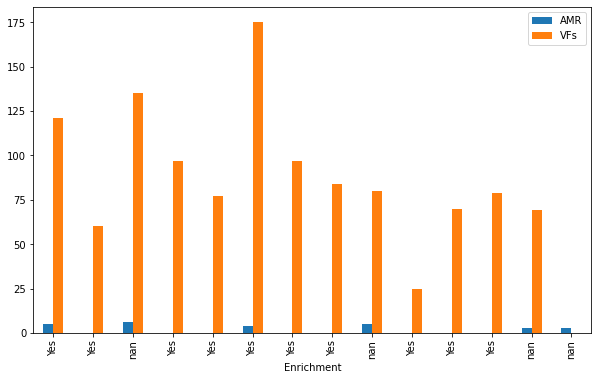

In [160]:

import matplotlib.pyplot as plt
import numpy as np

selection = result[(result["AMR"] != 0) | (result["VFs"] != 0)]
selection = selection.dropna(subset = ["AMR","VFs"])

#print(selection["Enrichment"])
#print(selection.columns)
selection.set_index(["Enrichment"], drop=True, inplace = True)
#print(selection)
selection.plot( kind = "bar",
                #x = ["Enrichment"],
                y = ["AMR","VFs"], 
                figsize=(10,6), 
                )
plt.show()